# Predict Customer Purchase Behavior

Nama : Aleisya Zahari Salam

Data : [KAGGLE - Predict Customer Purchase Behavior Dataset](https://www.kaggle.com/datasets/rabieelkharoua/predict-customer-purchase-behavior-dataset/data)

Description:
This dataset contains information on customer purchase behavior across various attributes, aiming to help data scientists and analysts understand the factors influencing purchase decisions. The dataset includes demographic information, purchasing habits, and other relevant features.
Features:

- Age: Customer's age
- Gender: Customer's gender (0: Male, 1: Female)
- Annual Income: Annual income of the customer in dollars
- Number of Purchases: Total number of purchases made by the customer
- Product Category: Category of the purchased product (0: Electronics, 1: Clothing, 2: Home Goods, 3: Beauty, 4: Sports)
- Time Spent on Website: Time spent by the customer on the website in minutes
- Loyalty Program: Whether the customer is a member of the loyalty program (0: No, 1: Yes)
- Discounts Availed: Number of discounts availed by the customer (range: 0-5)
- PurchaseStatus (Target Variable): Likelihood of the customer making a purchase (0: No, 1: Yes)

# Persiapan

## import library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
pip install kaggle opendatasets

## download dataset

In [ ]:
!kaggle datasets download -d rabieelkharoua/predict-customer-purchase-behavior-dataset

Dataset URL: https://www.kaggle.com/datasets/rabieelkharoua/predict-customer-purchase-behavior-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/35.1k [00:00<?, ?B/s]
100% 35.1k/35.1k [00:00<00:00, 48.0MB/s]


In [ ]:
!unzip '/content/predict-customer-purchase-behavior-dataset.zip'

Archive:  /content/predict-customer-purchase-behavior-dataset.zip
  inflating: customer_purchase_data.csv  


# Exploratory Data Analysis

## Read Dataset

In [ ]:
df = pd.read_csv('customer_purchase_data.csv')
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [ ]:
df_raw = df.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


In [ ]:
df.columns

Index(['Age', 'Gender', 'AnnualIncome', 'NumberOfPurchases', 'ProductCategory',
       'TimeSpentOnWebsite', 'LoyaltyProgram', 'DiscountsAvailed',
       'PurchaseStatus'],
      dtype='object')

Data memiliki 9 kolom dengan jumlah sebesar 1500 data.

## Data Quality Check

In [ ]:
list_items = []
for col in df.columns:
  list_items.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique(), df[col].unique()[:5]])
desc_df = pd.DataFrame(data=list_items, columns= 'Feature, Data Type, Null, Null %, Unique, Unique Sample'.split(','))
desc_df

,Feature,Data Type,Null,Null %,Unique,Unique Sample
0,Age,int64,0,0.0,53,"[40, 20, 27, 24, 31]"
1,Gender,int64,0,0.0,2,"[1, 0]"
2,AnnualIncome,float64,0,0.0,1388,"[66120.26793867795, 23579.773583030517, 127821..."
3,NumberOfPurchases,int64,0,0.0,21,"[8, 4, 11, 19, 14]"
4,ProductCategory,int64,0,0.0,5,"[0, 2, 3, 1, 4]"
5,TimeSpentOnWebsite,float64,0,0.0,1388,"[30.56860115599193, 38.2400966055442, 31.63321..."
6,LoyaltyProgram,int64,0,0.0,2,"[0, 1]"
7,DiscountsAvailed,int64,0,0.0,6,"[5, 0, 4, 2, 3]"
8,PurchaseStatus,int64,0,0.0,2,"[1, 0]"


Data tidak ditemukan nilai null

In [ ]:
# cek data duplicate
print('Jumlah data duplicate: ', df.duplicated().sum())

Jumlah data duplicate:  112


terdapat duplikat. Ada kemungkinan data dari kostumer yang berbeda, namun karena tidak ada id identifier jadi tidak pasti.

112 data akan dihapus.

## Deskriptif Statistik

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1500.0,44.298667,15.537259,18.000000,31.000000,45.000000,57.000000,70.000000
Gender,1500.0,0.504667,0.500145,0.000000,0.000000,1.000000,1.000000,1.000000
AnnualIncome,1500.0,84249.164338,37629.493078,20001.512518,53028.979155,83699.581476,117167.772858,149785.176481
NumberOfPurchases,1500.0,10.420000,5.887391,0.000000,5.000000,11.000000,15.000000,20.000000
ProductCategory,1500.0,2.012667,1.428005,0.000000,1.000000,2.000000,3.000000,4.000000
TimeSpentOnWebsite,1500.0,30.469040,16.984392,1.037023,16.156700,30.939516,44.369863,59.991105
LoyaltyProgram,1500.0,0.326667,0.469151,0.000000,0.000000,0.000000,1.000000,1.000000
DiscountsAvailed,1500.0,2.555333,1.705152,0.000000,1.000000,3.000000,4.000000,5.000000
PurchaseStatus,1500.0,0.432000,0.495520,0.000000,0.000000,0.000000,1.000000,1.000000


In [ ]:
# Mengelompokkan data numerik dan kategorik
nums = ['Age', 'AnnualIncome', 'NumberOfPurchases', 'TimeSpentOnWebsite','DiscountsAvailed']
cats = ['Gender', 'ProductCategory','LoyaltyProgram', 'PurchaseStatus']

## Univariat Analysis

### kategorik

- Age: Customer's age
Gender: Customer's gender (0: Male, 1: Female)

- Annual Income: Annual income of the customer in dollars

- Number of Purchases: Total number of purchases made by the customer

- Product Category: Category of the purchased product (0: Electronics, 1: Clothing, 2: Home Goods, 3: Beauty, 4: Sports)

- Time Spent on Website: Time spent by the customer on the website in minutes

- Loyalty Program: Whether the customer is a member of the loyalty program (0: No, 1: Yes)

- Discounts Availed: Number of discounts availed by the customer (range: 0-5)

- PurchaseStatus (Target Variable): Likelihood of the customer making a purchase (0: No, 1: Yes)

In [ ]:
df.head()

<bound method NDFrame.head of       Age  Gender   AnnualIncome  NumberOfPurchases  ProductCategory  \
0      40       1   66120.267939                  8                0   
1      20       1   23579.773583                  4                2   
2      27       1  127821.306432                 11                2   
3      24       1  137798.623120                 19                3   
4      31       1   99300.964220                 19                1   
...   ...     ...            ...                ...              ...   
1495   39       1   65048.141834                 13                0   
1496   67       1   28775.331069                 18                2   
1497   40       1   57363.247541                  7                4   
1498   63       0  134021.775532                 16                2   
1499   50       0   52625.665974                 13                0   

      TimeSpentOnWebsite  LoyaltyProgram  DiscountsAvailed  PurchaseStatus  
0              30.568601               0                 5               1  
1              38.240097               0                 5               0  
2              31.633212               1                 0               1  
3              46.167059               0                 4               1  
4              19.823592               0                 0               1  
...                  ...             ...               ...             ...  
1495           34.590743               0                 5               1  
1496           17.625707               0                 1               1  
1497           12.206033               0                 0               0  
1498           37.311634               1                 0               1  
1499           25.348017               1                 4               1  

[1500 rows x 9 columns]>

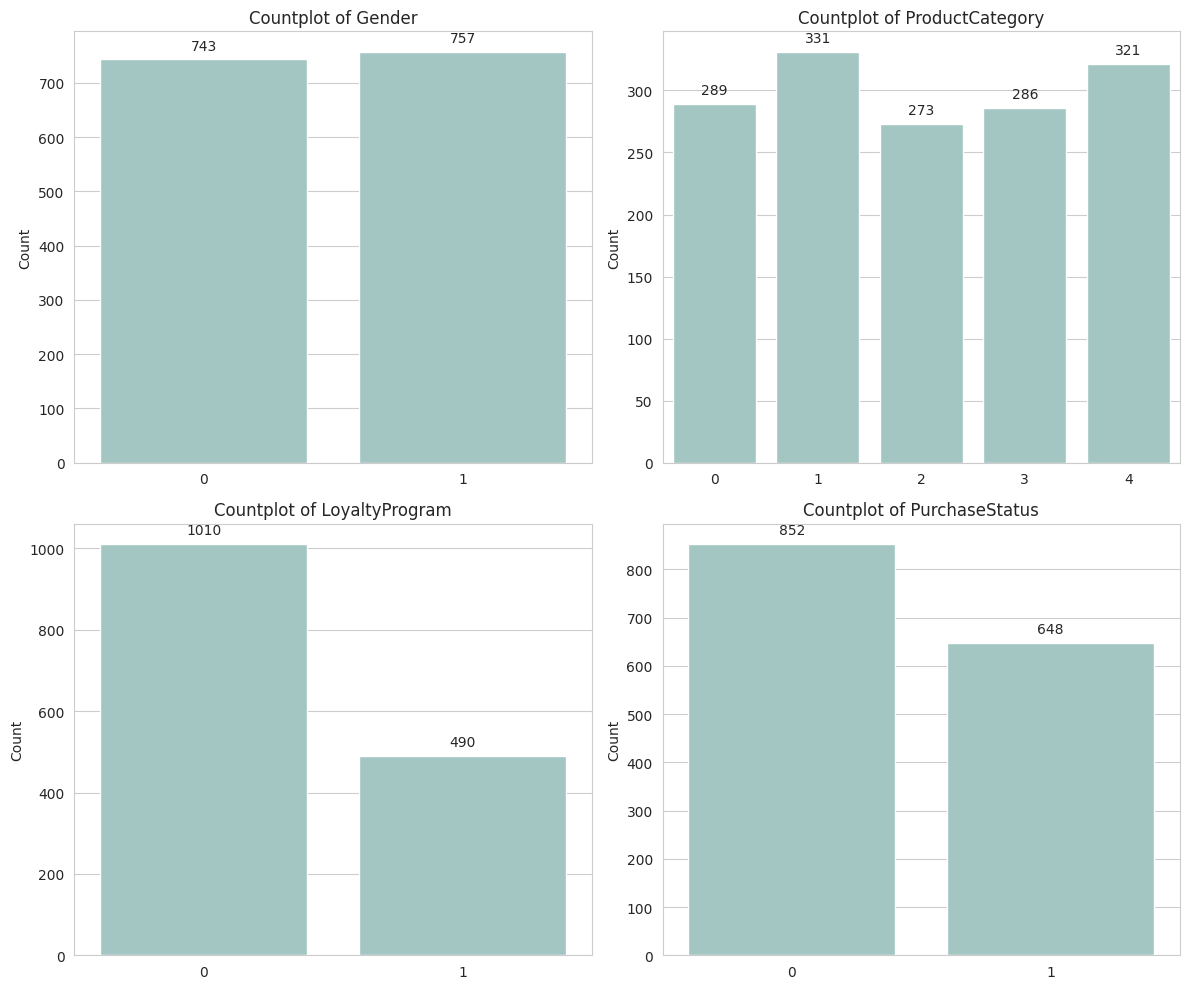

In [ ]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(len(cats)//2, 2, figsize=(12, 10))

axes = axes.flatten()
color = '#9eccc8'

for i, cat in enumerate(cats):
    sns.countplot(x=cat, data=df, ax=axes[i], color=color)
    axes[i].set_title(f'Countplot of {cat}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

    for p in axes[i].patches:
        axes[i].annotate(format(p.get_height(), '.0f'),
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha = 'center', va = 'center',
                         xytext = (0, 10),
                         textcoords = 'offset points')

plt.tight_layout()
plt.show()

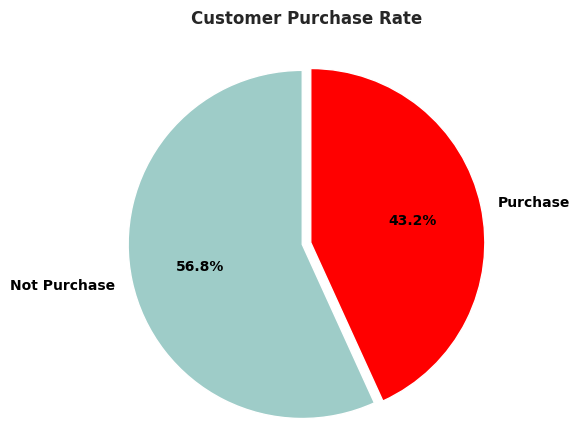

In [ ]:
purchase_rate = df['PurchaseStatus'].value_counts()
explode = (0.05, 0)
text_props = {'color': 'black', 'weight': 'bold'}

plt.figure(figsize=(7, 5))
plt.pie(purchase_rate, labels=['Not Purchase', 'Purchase'], autopct='%1.1f%%', startangle=90, explode = explode, colors = [ '#9eccc8', '#ff0000'], textprops=text_props)
plt.axis('equal')
plt.title('Customer Purchase Rate', fontweight='bold', pad=20)
plt.show()

### Numerik

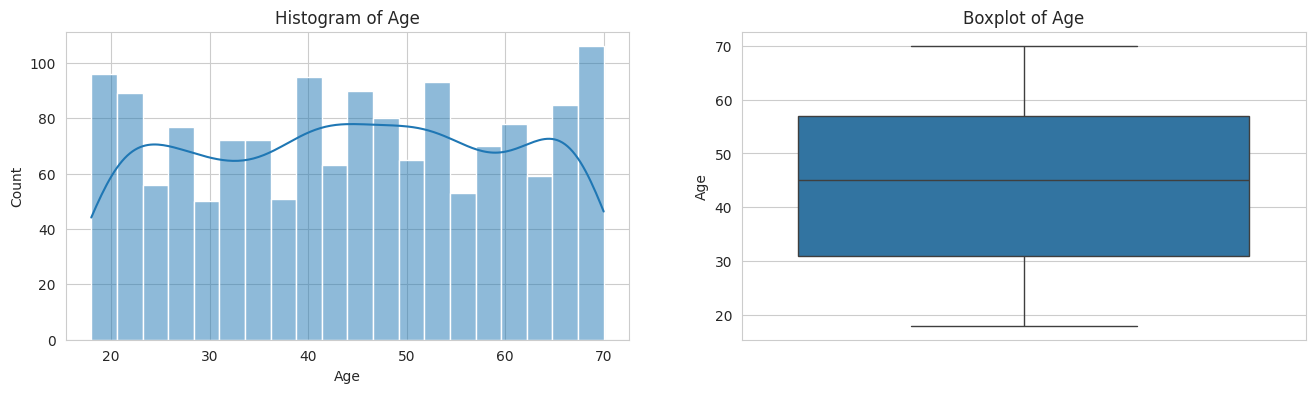

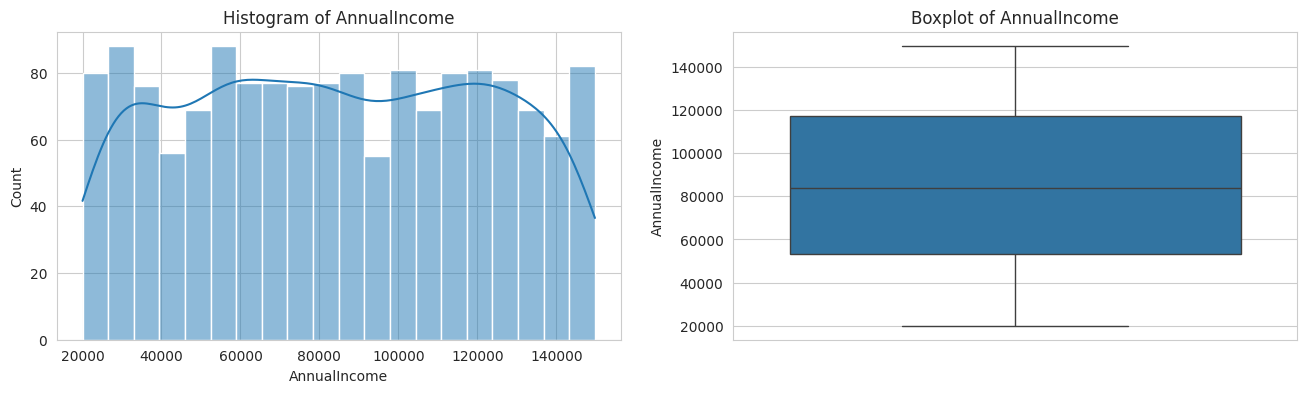

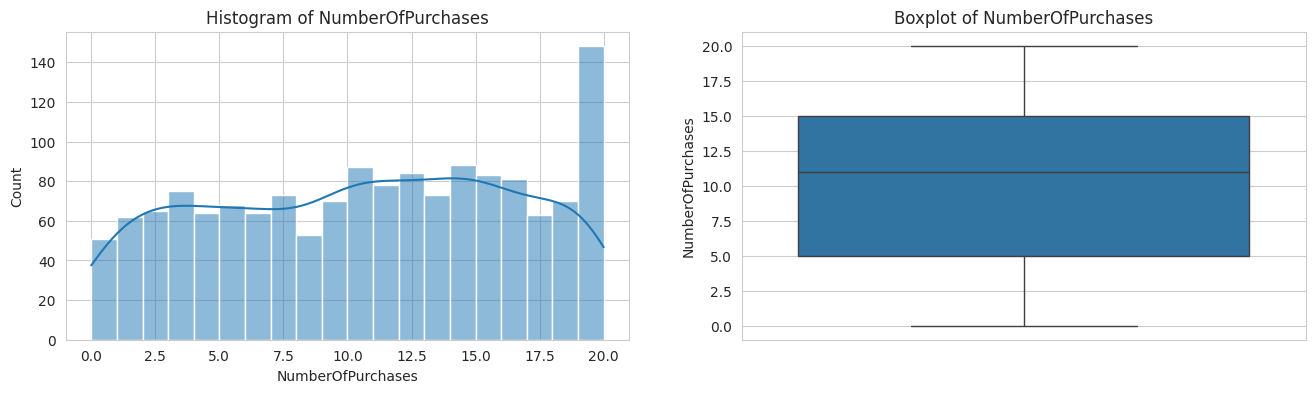

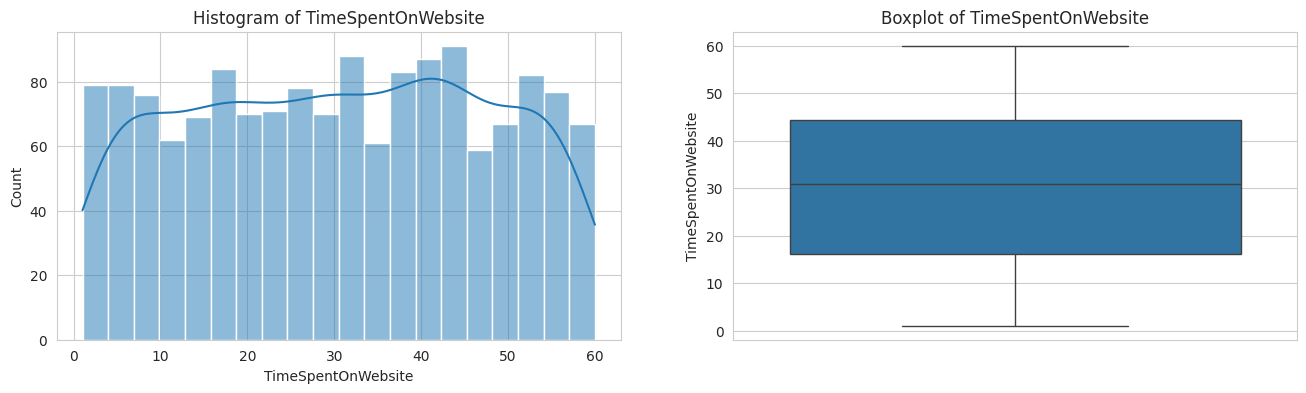

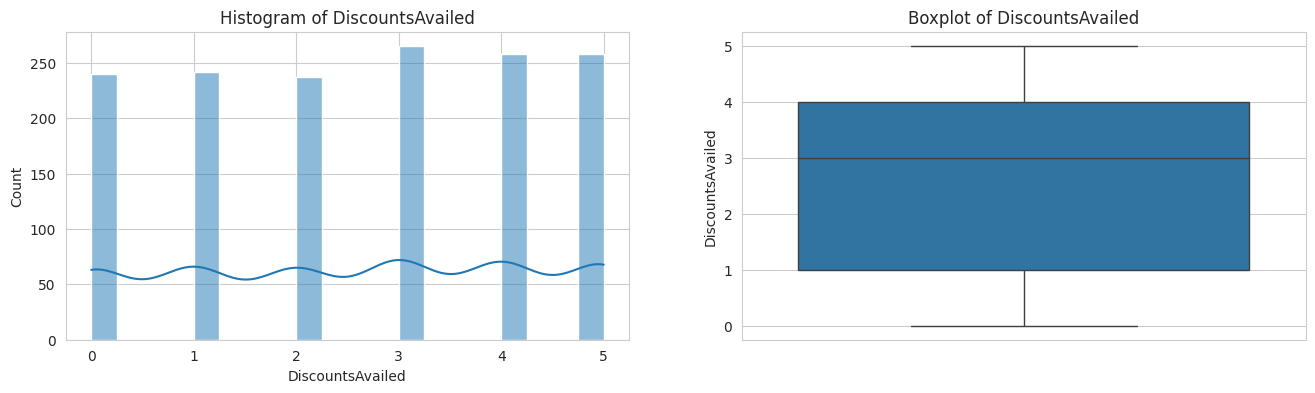

In [ ]:
for col in nums:
  fig, ax = plt.subplots(1,2, figsize=(16,4))
  sns.histplot(df[col], bins = 20, kde=True, ax=ax[0])
  sns.boxplot(df[col], ax=ax[1])
  ax[0].set_title(f'Histogram of {col}')
  ax[1].set_title(f'Boxplot of {col}')
  plt.tight_layout

In [ ]:
import scipy.stats as stats
# Filter numeric columns from DataFrame
numeric_data = df[nums]

# Perform Shapiro-Wilk test for normality on each numeric column
shapiro_results = {}
for col in numeric_data.columns:
    shapiro_results[col] = stats.shapiro(numeric_data[col])

# Output results
for col, result in shapiro_results.items():
    print(f"{col}: p-value = {result.pvalue}, Is Normally Distributed? {result.pvalue > 0.05}")


Age: p-value = 1.1373483150520496e-21, Is Normally Distributed? False
AnnualIncome: p-value = 4.087055792681493e-21, Is Normally Distributed? False
NumberOfPurchases: p-value = 2.822716404486005e-21, Is Normally Distributed? False
TimeSpentOnWebsite: p-value = 1.1312564394736565e-20, Is Normally Distributed? False
DiscountsAvailed: p-value = 2.243814326730669e-29, Is Normally Distributed? False


## Bivariate

### kategorik

In [ ]:
print(cats)

['Gender', 'ProductCategory', 'LoyaltyProgram', 'PurchaseStatus']


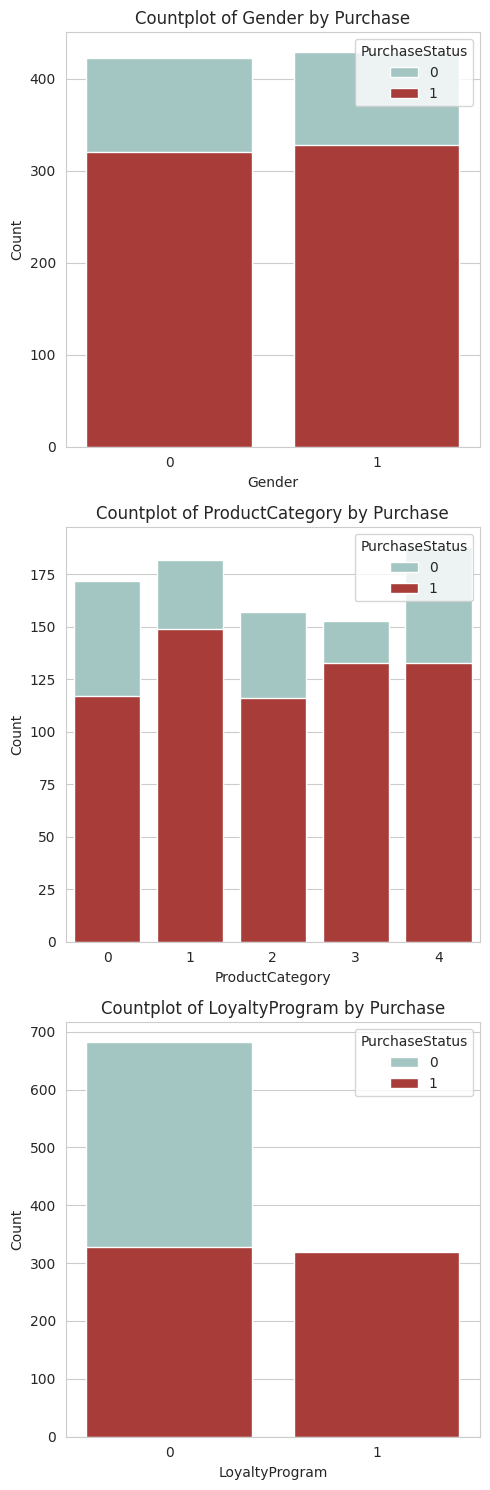

In [ ]:
color = '#9eccc8'
cats_1 = ['Gender', 'ProductCategory', 'LoyaltyProgram']
sns.set_style("whitegrid")

fig, axes = plt.subplots(3, 1, figsize=(5, 15))

for i, cat in enumerate(cats_1):
    sns.countplot(x=cat, hue='PurchaseStatus', data=df, ax=axes[i], palette=['#9eccc8', '#b92a27'], dodge=False)
    axes[i].set_title(f'Countplot of {cat} by Purchase')
    axes[i].set_xlabel(cat)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

### numerik

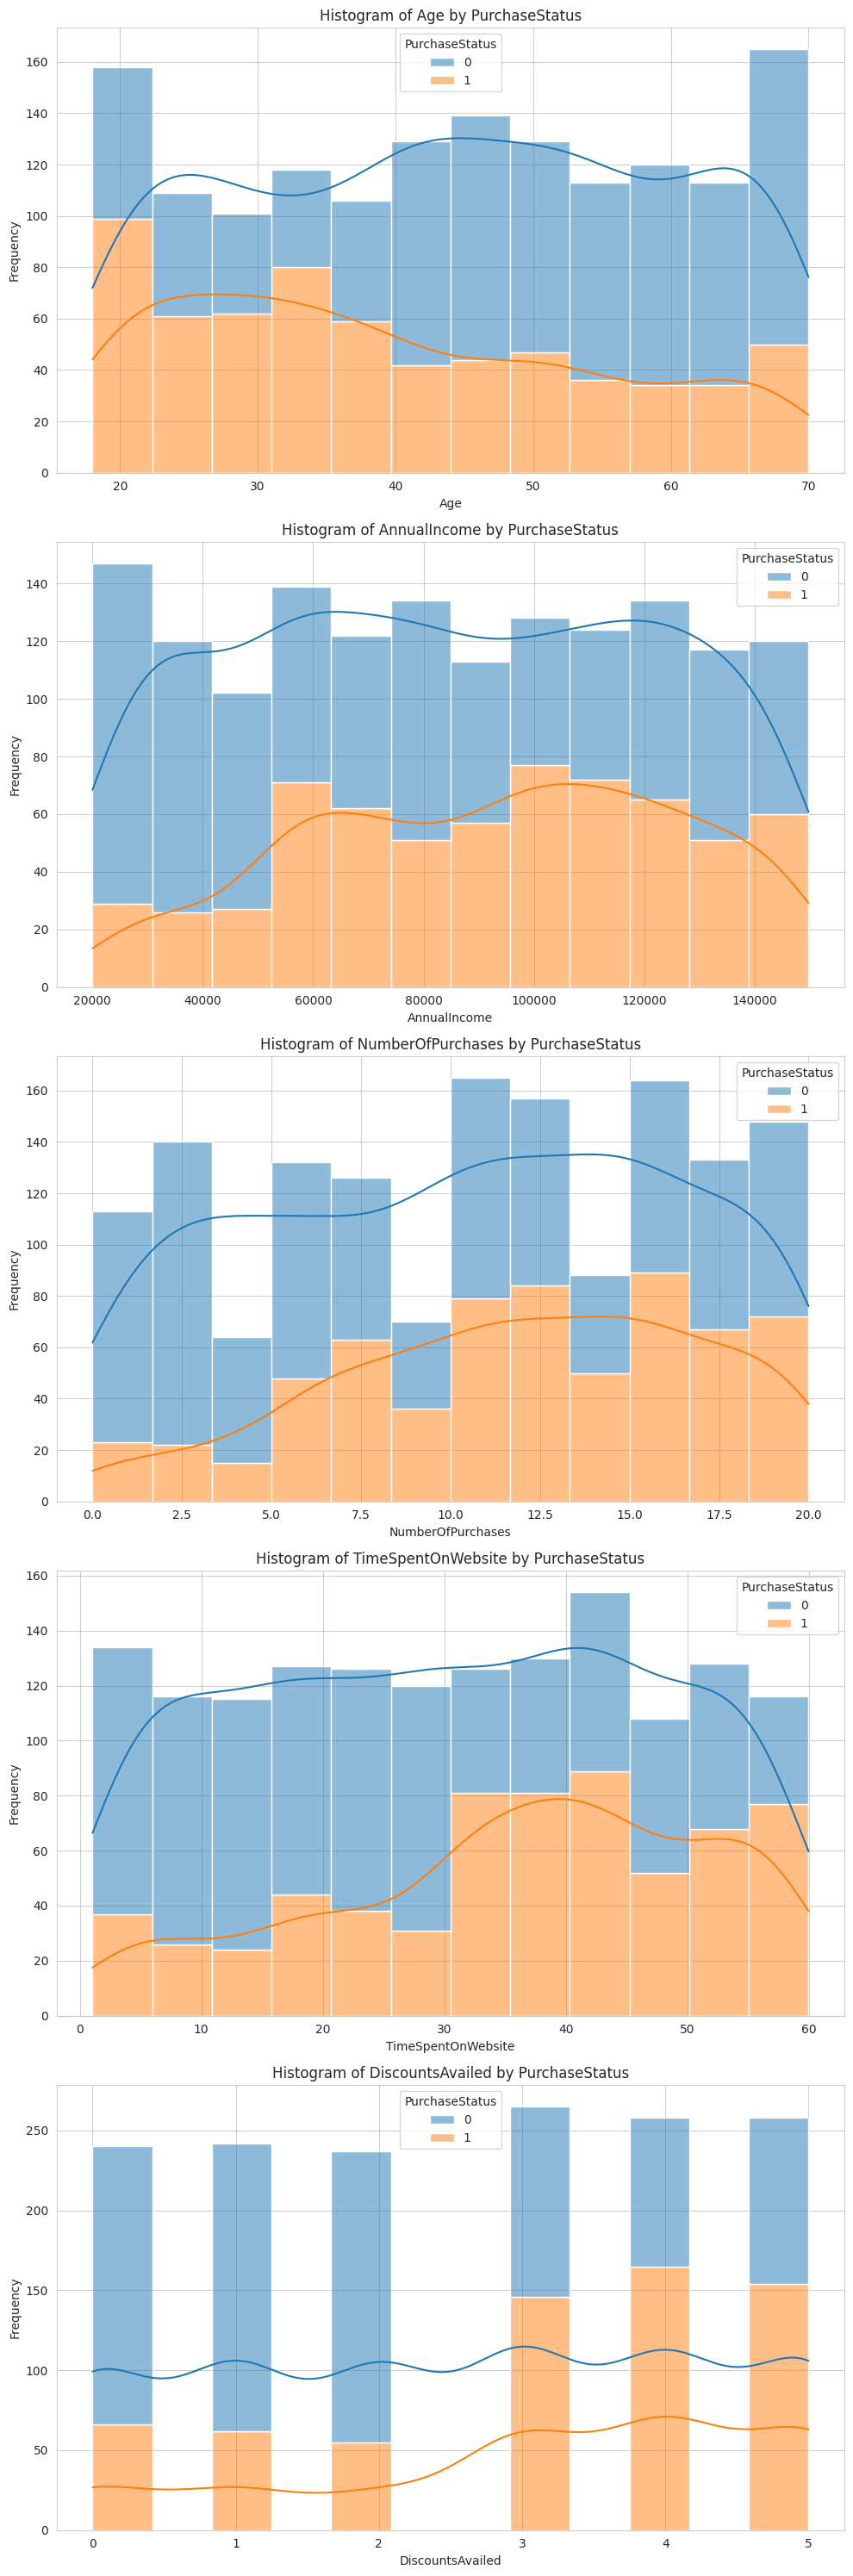

In [ ]:
fig, axes = plt.subplots(len(nums), 1, figsize=(10, 30))

for i, num in enumerate(nums):
    sns.histplot(data=df, x=num, hue='PurchaseStatus', multiple = 'stack', kde=True, ax=axes[i])

    axes[i].set_title(f'Histogram of {num} by PurchaseStatus')

    # Set the x-axis label
    axes[i].set_xlabel(num)

    # Set the y-axis label
    axes[i].set_ylabel('Frequency')

# Adjust layout for better display
plt.tight_layout()
plt.show()

## Cek Outlier

In [ ]:

outlier = []
no_outlier = []
is_outlier = []
low_lim = []
high_lim = []


filtered_entries = np.array([True] * len(df))
for col in nums:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    #filter outlier
    filter_outlier = ((df[col] >= low_limit) & (df[col] <= high_limit))
    outlier.append(len(df[~filter_outlier]))
    no_outlier.append(len(df[filter_outlier]))
    is_outlier.append(df[col][~filter_outlier].any())
    low_lim.append(low_limit)
    high_lim.append(high_limit)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries

print("Outlier All Data :", len(df[~filtered_entries]))
print("Not Outlier All Data :", len(df[filtered_entries]))
print()

pd.DataFrame({
    "Column Name":nums,
    "is Outlier": is_outlier,
    "Lower Limit": low_lim,
    "Upper Limit": high_lim,
    "Outlier":outlier,
    "No Outlier":no_outlier
})

Outlier All Data : 0
Not Outlier All Data : 1500



,Column Name,is Outlier,Lower Limit,Upper Limit,Outlier,No Outlier
0,Age,False,-8.000000,96.000000,0,1500
1,AnnualIncome,False,-43179.211398,213375.963411,0,1500
2,NumberOfPurchases,False,-10.000000,30.000000,0,1500
3,TimeSpentOnWebsite,False,-26.163043,86.689606,0,1500
4,DiscountsAvailed,False,-3.500000,8.500000,0,1500


Tidak ditemukan outlier

## Correlation

<Axes: >

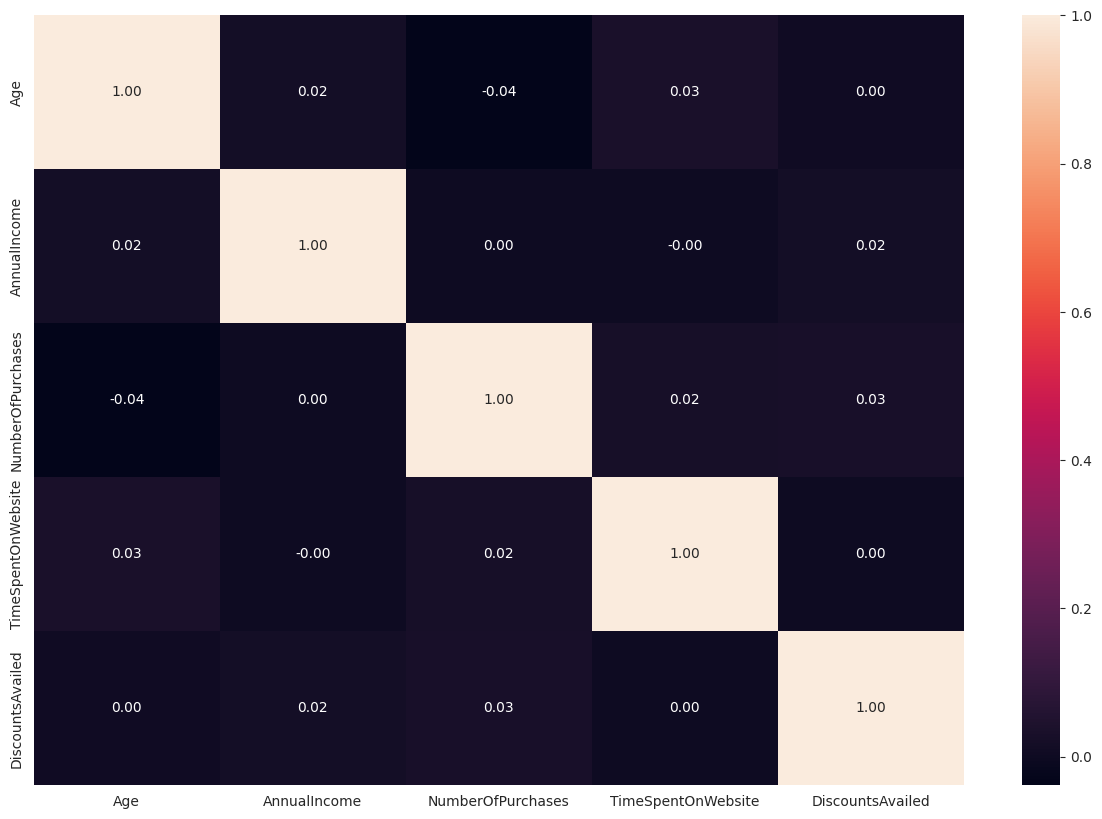

In [ ]:
df_nums = df[nums]
plt.figure(figsize=(15,10))
sns.heatmap(df_nums.corr(), annot=True, fmt='.2f')

Korelasi antar kolom tidak signifikan, tidak ada yang perlu dihapus

In [ ]:
from scipy.stats import chi2_contingency
chi2_array, p_array = [], []

for column in cats_1:
    crosstab = pd.crosstab(df[column], df['PurchaseStatus'])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    chi2_array.append(chi2)
    p_array.append(p)

df_chi = pd.DataFrame({
    'Variable': cats_1,
    'Chi-square': chi2_array,
    'p-value': p_array
})
df_chi.sort_values(by='Chi-square', ascending=False)

,Variable,Chi-square,p-value
2,LoyaltyProgram,143.595350,4.355743e-33
1,ProductCategory,3.049346,5.496018e-01
0,Gender,0.002463,9.604218e-01


- `LoyaltyProgram` memiliki hubungan yang kuat dengan target
- `ProductCategory` tidak ada hubungan yang signifikan dengan target
- `Gender` tidak ada hubungan yang signifikan dengan target

Ketiga kolom tetap dimasukkan untuk melihat bagaimana pengaruh kolom tersebut pada pembelian

# preprocessing

In [ ]:
df_fe = df_raw.copy()
df_fe.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [ ]:
df_fe.columns

Index(['Age', 'Gender', 'AnnualIncome', 'NumberOfPurchases', 'ProductCategory',
       'TimeSpentOnWebsite', 'LoyaltyProgram', 'DiscountsAvailed',
       'PurchaseStatus'],
      dtype='object')

## Pengelompokkan column age

In [ ]:
bins = [18, 23, 28, 33, 38, 43, 48, 53, 58, 63, 68, 71]
labels = ['18-22', '23-27', '28-32', '33-37', '38-42', '43-47', '48-52', '53-57', '58-62', '63-67', '68-70']

# Create age groups
df_fe['AgeGroup'] = pd.cut(df_fe['Age'], bins=bins, labels=labels, right=False)

In [ ]:
df_fe.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus,AgeGroup
0,40,1,66120.267939,8,0,30.568601,0,5,1,38-42
1,20,1,23579.773583,4,2,38.240097,0,5,0,18-22
2,27,1,127821.306432,11,2,31.633212,1,0,1,23-27
3,24,1,137798.623120,19,3,46.167059,0,4,1,23-27
4,31,1,99300.964220,19,1,19.823592,0,0,1,28-32


- age dikelompokkan
- one hot : gender, product category

## gender

kolom gender dikembalikan menjadi string untuk one hot encoding

In [ ]:
df_fe['Gender'].value_counts()

,count
Gender,
1,757
0,743


In [ ]:
df_fe['Gender'] = df_fe['Gender'].map({0: 'Male', 1: 'Female'})

In [ ]:
df_fe['Gender'].value_counts()

,count
Gender,
Female,757
Male,743


## Pengelompokkan income

dilakukan pengelompokkan agar data lebih mudah dianalisis insightnya

In [ ]:
quartiles = pd.qcut(df_fe['AnnualIncome'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Assign quartile labels to a new column
df_fe['IncomeQuartile'] = quartiles

In [ ]:
df_fe['IncomeQuartile'].value_counts()

,count
IncomeQuartile,
Q3,376
Q1,375
Q2,375
Q4,374


In [ ]:
quartiles = pd.qcut(df_fe['NumberOfPurchases'], q=4, labels=['Low Spender', 'Moderate Spender', 'High Spender', 'Top Spender'])

# Assign quartile labels to a new column
df_fe['NumberofPurchase_Categories'] = quartiles

In [ ]:
df_fe['NumberofPurchase_Categories'].value_counts()

,count
NumberofPurchase_Categories,
Moderate Spender,425
Low Spender,385
Top Spender,362
High Spender,328


In [ ]:
df_fe.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus,AgeGroup,IncomeQuartile,NumberofPurchase_Categories
0,40,Female,66120.267939,8,0,30.568601,0,5,1,38-42,Q2,Moderate Spender
1,20,Female,23579.773583,4,2,38.240097,0,5,0,18-22,Q1,Low Spender
2,27,Female,127821.306432,11,2,31.633212,1,0,1,23-27,Q4,Moderate Spender
3,24,Female,137798.623120,19,3,46.167059,0,4,1,23-27,Q4,Top Spender
4,31,Female,99300.964220,19,1,19.823592,0,0,1,28-32,Q3,Top Spender


## one hot encoding

kolom yang akan di lakukan one hot encoding : `ProductCategory`, `Gender`, `NumberofPurchase_Categories`, `IncomeQuartile`, `AgeGroup`

In [ ]:
df_ohe = df_fe.copy()
df_ohe.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus,AgeGroup,IncomeQuartile,NumberofPurchase_Categories
0,40,Female,66120.267939,8,0,30.568601,0,5,1,38-42,Q2,Moderate Spender
1,20,Female,23579.773583,4,2,38.240097,0,5,0,18-22,Q1,Low Spender
2,27,Female,127821.306432,11,2,31.633212,1,0,1,23-27,Q4,Moderate Spender
3,24,Female,137798.623120,19,3,46.167059,0,4,1,23-27,Q4,Top Spender
4,31,Female,99300.964220,19,1,19.823592,0,0,1,28-32,Q3,Top Spender


In [ ]:
df_ohe = df_ohe.drop(columns=['Age', 'AnnualIncome', 'NumberOfPurchases'])


In [ ]:
df_ohe.head()

,Gender,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus,AgeGroup,IncomeQuartile,NumberofPurchase_Categories
0,Female,0,30.568601,0,5,1,38-42,Q2,Moderate Spender
1,Female,2,38.240097,0,5,0,18-22,Q1,Low Spender
2,Female,2,31.633212,1,0,1,23-27,Q4,Moderate Spender
3,Female,3,46.167059,0,4,1,23-27,Q4,Top Spender
4,Female,1,19.823592,0,0,1,28-32,Q3,Top Spender


### gender, NumberofPurchase_Categories, IncomeQuartile, AgeGroup

In [ ]:
df_ohe.columns

Index(['Gender', 'ProductCategory', 'TimeSpentOnWebsite', 'LoyaltyProgram',
       'DiscountsAvailed', 'PurchaseStatus', 'AgeGroup', 'IncomeQuartile',
       'NumberofPurchase_Categories'],
      dtype='object')

In [ ]:
column_ohe = ['ProductCategory', 'Gender', 'NumberofPurchase_Categories', 'IncomeQuartile', 'AgeGroup']

In [ ]:
df_encoded = pd.get_dummies(df_ohe, columns=column_ohe)

In [ ]:
df_encoded['TimeSpentOnWebsite'] = df_encoded['TimeSpentOnWebsite'].round()

In [ ]:
df_encoded.head()

,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus,ProductCategory_0,ProductCategory_1,ProductCategory_2,ProductCategory_3,ProductCategory_4,Gender_Female,...,AgeGroup_23-27,AgeGroup_28-32,AgeGroup_33-37,AgeGroup_38-42,AgeGroup_43-47,AgeGroup_48-52,AgeGroup_53-57,AgeGroup_58-62,AgeGroup_63-67,AgeGroup_68-70
0,31.0,0,5,1,True,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
1,38.0,0,5,0,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,32.0,1,0,1,False,False,True,False,False,True,...,True,False,False,False,False,False,False,False,False,False
3,46.0,0,4,1,False,False,False,True,False,True,...,True,False,False,False,False,False,False,False,False,False
4,20.0,0,0,1,False,True,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False


## split data

In [ ]:
x = df_encoded.drop(columns=['PurchaseStatus'], axis=1)
y = df_encoded['PurchaseStatus']

In [ ]:
print(y)

0       1
1       0
2       1
3       1
4       1
       ..
1495    1
1496    1
1497    0
1498    1
1499    1
Name: PurchaseStatus, Length: 1500, dtype: int64


In [ ]:
# bagi data menjadi data train dan data test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
X_train.head()

,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,ProductCategory_0,ProductCategory_1,ProductCategory_2,ProductCategory_3,ProductCategory_4,Gender_Female,Gender_Male,...,AgeGroup_23-27,AgeGroup_28-32,AgeGroup_33-37,AgeGroup_38-42,AgeGroup_43-47,AgeGroup_48-52,AgeGroup_53-57,AgeGroup_58-62,AgeGroup_63-67,AgeGroup_68-70
382,17.0,0,3,True,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
538,15.0,1,4,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,True,False,False
1493,54.0,0,0,False,True,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
1112,12.0,0,0,True,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
324,43.0,0,4,True,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
X_test.head()

,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,ProductCategory_0,ProductCategory_1,ProductCategory_2,ProductCategory_3,ProductCategory_4,Gender_Female,Gender_Male,...,AgeGroup_23-27,AgeGroup_28-32,AgeGroup_33-37,AgeGroup_38-42,AgeGroup_43-47,AgeGroup_48-52,AgeGroup_53-57,AgeGroup_58-62,AgeGroup_63-67,AgeGroup_68-70
1116,23.0,1,5,False,False,False,True,False,True,False,...,False,False,False,True,False,False,False,False,False,False
1368,12.0,0,1,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
422,46.0,0,0,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
413,1.0,0,1,False,False,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
451,49.0,1,3,False,False,False,False,True,True,False,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
X_train.columns

Index(['TimeSpentOnWebsite', 'LoyaltyProgram', 'DiscountsAvailed',
       'ProductCategory_0', 'ProductCategory_1', 'ProductCategory_2',
       'ProductCategory_3', 'ProductCategory_4', 'Gender_Female',
       'Gender_Male', 'NumberofPurchase_Categories_Low Spender',
       'NumberofPurchase_Categories_Moderate Spender',
       'NumberofPurchase_Categories_High Spender',
       'NumberofPurchase_Categories_Top Spender', 'IncomeQuartile_Q1',
       'IncomeQuartile_Q2', 'IncomeQuartile_Q3', 'IncomeQuartile_Q4',
       'AgeGroup_18-22', 'AgeGroup_23-27', 'AgeGroup_28-32', 'AgeGroup_33-37',
       'AgeGroup_38-42', 'AgeGroup_43-47', 'AgeGroup_48-52', 'AgeGroup_53-57',
       'AgeGroup_58-62', 'AgeGroup_63-67', 'AgeGroup_68-70'],
      dtype='object')

In [ ]:
X_test.columns

Index(['TimeSpentOnWebsite', 'LoyaltyProgram', 'DiscountsAvailed',
       'ProductCategory_0', 'ProductCategory_1', 'ProductCategory_2',
       'ProductCategory_3', 'ProductCategory_4', 'Gender_Female',
       'Gender_Male', 'NumberofPurchase_Categories_Low Spender',
       'NumberofPurchase_Categories_Moderate Spender',
       'NumberofPurchase_Categories_High Spender',
       'NumberofPurchase_Categories_Top Spender', 'IncomeQuartile_Q1',
       'IncomeQuartile_Q2', 'IncomeQuartile_Q3', 'IncomeQuartile_Q4',
       'AgeGroup_18-22', 'AgeGroup_23-27', 'AgeGroup_28-32', 'AgeGroup_33-37',
       'AgeGroup_38-42', 'AgeGroup_43-47', 'AgeGroup_48-52', 'AgeGroup_53-57',
       'AgeGroup_58-62', 'AgeGroup_63-67', 'AgeGroup_68-70'],
      dtype='object')

In [ ]:
columns_to_convert = [
    'ProductCategory_0', 'ProductCategory_1', 'ProductCategory_2',
    'ProductCategory_3', 'ProductCategory_4', 'Gender_Female',
    'Gender_Male', 'NumberofPurchase_Categories_Low Spender',
    'NumberofPurchase_Categories_Moderate Spender',
    'NumberofPurchase_Categories_High Spender',
    'NumberofPurchase_Categories_Top Spender', 'IncomeQuartile_Q1',
    'IncomeQuartile_Q2', 'IncomeQuartile_Q3', 'IncomeQuartile_Q4',
    'AgeGroup_18-22', 'AgeGroup_23-27', 'AgeGroup_28-32', 'AgeGroup_33-37',
    'AgeGroup_38-42', 'AgeGroup_43-47', 'AgeGroup_48-52', 'AgeGroup_53-57',
    'AgeGroup_58-62', 'AgeGroup_63-67', 'AgeGroup_68-70'
]

In [ ]:
X_train[columns_to_convert] = X_train[columns_to_convert].astype(int)

In [ ]:
X_test[columns_to_convert] = X_test[columns_to_convert].astype(int)

In [ ]:
X_train.head()

,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,ProductCategory_0,ProductCategory_1,ProductCategory_2,ProductCategory_3,ProductCategory_4,Gender_Female,Gender_Male,...,AgeGroup_23-27,AgeGroup_28-32,AgeGroup_33-37,AgeGroup_38-42,AgeGroup_43-47,AgeGroup_48-52,AgeGroup_53-57,AgeGroup_58-62,AgeGroup_63-67,AgeGroup_68-70
382,17.0,0,3,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
538,15.0,1,4,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
1493,54.0,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1112,12.0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
324,43.0,0,4,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
X_train.head()

,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,ProductCategory_0,ProductCategory_1,ProductCategory_2,ProductCategory_3,ProductCategory_4,Gender_Female,Gender_Male,...,AgeGroup_23-27,AgeGroup_28-32,AgeGroup_33-37,AgeGroup_38-42,AgeGroup_43-47,AgeGroup_48-52,AgeGroup_53-57,AgeGroup_58-62,AgeGroup_63-67,AgeGroup_68-70
382,17.0,0,3,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
538,15.0,1,4,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
1493,54.0,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1112,12.0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
324,43.0,0,4,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
X_test.head()

,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,ProductCategory_0,ProductCategory_1,ProductCategory_2,ProductCategory_3,ProductCategory_4,Gender_Female,Gender_Male,...,AgeGroup_23-27,AgeGroup_28-32,AgeGroup_33-37,AgeGroup_38-42,AgeGroup_43-47,AgeGroup_48-52,AgeGroup_53-57,AgeGroup_58-62,AgeGroup_63-67,AgeGroup_68-70
1116,23.0,1,5,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1368,12.0,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
422,46.0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
413,1.0,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
451,49.0,1,3,0,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
X_train.columns

Index(['TimeSpentOnWebsite', 'LoyaltyProgram', 'DiscountsAvailed',
       'ProductCategory_0', 'ProductCategory_1', 'ProductCategory_2',
       'ProductCategory_3', 'ProductCategory_4', 'Gender_Female',
       'Gender_Male', 'NumberofPurchase_Categories_Low Spender',
       'NumberofPurchase_Categories_Moderate Spender',
       'NumberofPurchase_Categories_High Spender',
       'NumberofPurchase_Categories_Top Spender', 'IncomeQuartile_Q1',
       'IncomeQuartile_Q2', 'IncomeQuartile_Q3', 'IncomeQuartile_Q4',
       'AgeGroup_18-22', 'AgeGroup_23-27', 'AgeGroup_28-32', 'AgeGroup_33-37',
       'AgeGroup_38-42', 'AgeGroup_43-47', 'AgeGroup_48-52', 'AgeGroup_53-57',
       'AgeGroup_58-62', 'AgeGroup_63-67', 'AgeGroup_68-70'],
      dtype='object')

In [ ]:
columns_to_convert = [
       'LoyaltyProgram',
       'ProductCategory_0', 'ProductCategory_1', 'ProductCategory_2',
       'ProductCategory_3', 'ProductCategory_4',
       'NumberofPurchase_Categories_Low Spender',
       'NumberofPurchase_Categories_Moderate Spender',
       'NumberofPurchase_Categories_High Spender',
       'NumberofPurchase_Categories_Top Spender', 'IncomeQuartile_Q1',
       'IncomeQuartile_Q2', 'IncomeQuartile_Q3', 'IncomeQuartile_Q4',
       'AgeGroup_18-22', 'AgeGroup_23-27', 'AgeGroup_28-32', 'AgeGroup_33-37',
       'AgeGroup_38-42', 'AgeGroup_43-47', 'AgeGroup_48-52', 'AgeGroup_53-57',
       'AgeGroup_58-62', 'AgeGroup_63-67', 'AgeGroup_68-70']

In [ ]:
X_train[columns_to_convert] = X_train[columns_to_convert].astype(int)

In [ ]:
X_test[columns_to_convert] = X_test[columns_to_convert].astype(int)

## minmaxscaller & standard scaller

In [ ]:
X_train_raw = X_train.copy()
X_test_raw = X_test.copy()

### standardscaler

In [ ]:
scaler_ss = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Fit the scaler to the training data
scaler_ss.fit(X_train_scaled[['TimeSpentOnWebsite', 'DiscountsAvailed']])

# Transform both training and test data
# X_train_scaled = scaler_ss.transform(X_train[['TimeSpentOnWebsite', 'DiscountsAvailed']])
# X_test_scaled = scaler_ss.transform(X_test[['TimeSpentOnWebsite', 'DiscountsAvailed']])


X_train_scaled[['TimeSpentOnWebsite', 'DiscountsAvailed']] = scaler_ss.transform(X_train_scaled[['TimeSpentOnWebsite', 'DiscountsAvailed']])
X_test_scaled[['TimeSpentOnWebsite', 'DiscountsAvailed']] = scaler_ss.transform(X_test_scaled[['TimeSpentOnWebsite', 'DiscountsAvailed']])


In [ ]:
print(X_test_scaled.shape)
print(X_train_scaled.shape)


(300, 29)
(1200, 29)


### minmaxscaler

In [ ]:
scaler_mm = MinMaxScaler()
X_train_minmax = X_train.copy()
X_test_minmax = X_test.copy()

In [ ]:

X_train_minmax[['TimeSpentOnWebsite', 'DiscountsAvailed']] = scaler_mm.fit_transform(X_train_minmax[['TimeSpentOnWebsite', 'DiscountsAvailed']])
X_test_minmax[['TimeSpentOnWebsite', 'DiscountsAvailed']] = scaler_mm.transform(X_test_minmax[['TimeSpentOnWebsite', 'DiscountsAvailed']])

In [ ]:
X_train_minmax.shape

(1200, 29)

# Modeling

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#model evaluation

def eval_classification_scaled(model):
    y_pred = model.predict(X_test_scaled)
    y_pred_train = model.predict(X_train_scaled)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("\nPrecision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("\nRecall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("\nF1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))

def roc_auc_eval_scaled(model):
    y_pred_proba = model.predict_proba(X_test_scaled)
    y_pred_proba_train = model.predict_proba(X_train_scaled)

    print("\nroc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

In [ ]:
#model evaluation

def eval_classification_minmax(model):
    y_pred = model.predict(X_test_minmax)
    y_pred_train = model.predict(X_train_minmax)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("\nPrecision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("\nRecall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("\nF1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))

def roc_auc_eval_minmax(model):
    y_pred_proba = model.predict_proba(X_test_minmax)
    y_pred_proba_train = model.predict_proba(X_train_minmax)

    print("\nroc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

In [ ]:
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(300, 29)
(1200, 29)
(300,)
(1200,)


## Decision Tree

In [ ]:
dt_mm = DecisionTreeClassifier()
dt_mm.fit(X_train_minmax, y_train)

DecisionTreeClassifier()

In [ ]:
eval_classification_minmax(dt_mm)
roc_auc_eval_minmax(dt_mm)

Accuracy (Test Set): 0.84
Accuracy (Train set): 1.00

Precision (Test Set): 0.82
Precision (Train Set): 1.00

Recall (Test Set): 0.81
Recall (Train Set): 1.00

F1-Score (Test Set): 0.82
F1-Score (Train Set): 1.00

roc_auc (test-proba): 0.84
roc_auc (train-proba): 1.00


In [ ]:
dt_ss= DecisionTreeClassifier()
dt_ss.fit(X_train_scaled, y_train)

eval_classification_scaled(dt_ss)
roc_auc_eval_scaled(dt_ss)

Accuracy (Test Set): 0.85
Accuracy (Train set): 1.00

Precision (Test Set): 0.82
Precision (Train Set): 1.00

Recall (Test Set): 0.82
Recall (Train Set): 1.00

F1-Score (Test Set): 0.82
F1-Score (Train Set): 1.00

roc_auc (test-proba): 0.84
roc_auc (train-proba): 1.00


## svm

In [ ]:
# svm
svm_mm = SVC()

# fit model
svm_mm.fit(X_train_minmax, y_train)

SVC()

In [ ]:
eval_classification_minmax(svm_mm)
# roc_auc_eval_minmax(svm_mm)

Accuracy (Test Set): 0.86
Accuracy (Train set): 0.92

Precision (Test Set): 0.90
Precision (Train Set): 0.93

Recall (Test Set): 0.75
Recall (Train Set): 0.87

F1-Score (Test Set): 0.82
F1-Score (Train Set): 0.90


In [ ]:
# svm
svm_ss = SVC()

# fit model
svm_ss.fit(X_train_scaled, y_train)
eval_classification_scaled(svm_ss)
# roc_auc_eval_scaled(svm_ss)

Accuracy (Test Set): 0.88
Accuracy (Train set): 0.93

Precision (Test Set): 0.92
Precision (Train Set): 0.94

Recall (Test Set): 0.79
Recall (Train Set): 0.89

F1-Score (Test Set): 0.85
F1-Score (Train Set): 0.92


## Logistic Regression

In [ ]:
# logistic regression
logreg_mm = LogisticRegression()

# fit model
logreg_mm.fit(X_train_minmax, y_train)


LogisticRegression()

In [ ]:
eval_classification_minmax(logreg_mm)
roc_auc_eval_minmax(logreg_mm)

Accuracy (Test Set): 0.88
Accuracy (Train set): 0.87

Precision (Test Set): 0.91
Precision (Train Set): 0.87

Recall (Test Set): 0.80
Recall (Train Set): 0.83

F1-Score (Test Set): 0.85
F1-Score (Train Set): 0.85

roc_auc (test-proba): 0.93
roc_auc (train-proba): 0.93


In [ ]:
# logistic regression
logreg_ss = LogisticRegression()

# fit model
logreg_ss.fit(X_train_scaled, y_train)

eval_classification_scaled(logreg_ss)
roc_auc_eval_scaled(logreg_ss)

Accuracy (Test Set): 0.88
Accuracy (Train set): 0.87

Precision (Test Set): 0.91
Precision (Train Set): 0.88

Recall (Test Set): 0.80
Recall (Train Set): 0.82

F1-Score (Test Set): 0.85
F1-Score (Train Set): 0.85

roc_auc (test-proba): 0.93
roc_auc (train-proba): 0.93


## KNN

In [ ]:
# knn
knn_mm = KNeighborsClassifier()

# fit model
knn_mm.fit(X_train_minmax, y_train)

KNeighborsClassifier()

In [ ]:
eval_classification_minmax(knn_mm)
roc_auc_eval_minmax(knn_mm)

Accuracy (Test Set): 0.73
Accuracy (Train set): 0.83

Precision (Test Set): 0.71
Precision (Train Set): 0.84

Recall (Test Set): 0.62
Recall (Train Set): 0.76

F1-Score (Test Set): 0.66
F1-Score (Train Set): 0.80

roc_auc (test-proba): 0.80
roc_auc (train-proba): 0.91


In [ ]:
# knn
knn_ss = KNeighborsClassifier()

# fit model
knn_ss.fit(X_train_scaled, y_train)

eval_classification_scaled(knn_ss)
roc_auc_eval_scaled(knn_ss)

Accuracy (Test Set): 0.80
Accuracy (Train set): 0.84

Precision (Test Set): 0.81
Precision (Train Set): 0.85

Recall (Test Set): 0.71
Recall (Train Set): 0.76

F1-Score (Test Set): 0.76
F1-Score (Train Set): 0.81

roc_auc (test-proba): 0.85
roc_auc (train-proba): 0.91


## Random Forest

In [ ]:
rf_mm = RandomForestClassifier()
rf_mm.fit(X_train_minmax, y_train)


RandomForestClassifier()

In [ ]:
eval_classification_minmax(rf_mm)
roc_auc_eval_minmax(rf_mm)

Accuracy (Test Set): 0.91
Accuracy (Train set): 1.00

Precision (Test Set): 0.97
Precision (Train Set): 1.00

Recall (Test Set): 0.81
Recall (Train Set): 1.00

F1-Score (Test Set): 0.89
F1-Score (Train Set): 1.00

roc_auc (test-proba): 0.95
roc_auc (train-proba): 1.00


In [ ]:
rf_ss = RandomForestClassifier()
rf_ss.fit(X_train_scaled, y_train)
eval_classification_scaled(rf_ss)
roc_auc_eval_scaled(rf_ss)

Accuracy (Test Set): 0.91
Accuracy (Train set): 1.00

Precision (Test Set): 0.97
Precision (Train Set): 1.00

Recall (Test Set): 0.80
Recall (Train Set): 1.00

F1-Score (Test Set): 0.88
F1-Score (Train Set): 1.00

roc_auc (test-proba): 0.95
roc_auc (train-proba): 1.00


## Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

### Decision Tree

In [ ]:
# grid decision tree
param_grid = {
    'criterion': ['gini', 'entropy'],  # Quality of split
    'max_depth': [None, 3, 5, 7, 9],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required to be at a leaf node
}

grid_tree_ss = GridSearchCV(dt_ss, param_grid, cv=5, scoring='accuracy')
grid_tree_ss.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 5, 7, 9],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [ ]:
# grid decision tree
param_grid = {
    'criterion': ['gini', 'entropy'],  # Quality of split
    'max_depth': [None, 3, 5, 7, 9],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required to be at a leaf node
}

grid_tree_mm = GridSearchCV(dt_mm, param_grid, cv=5, scoring='accuracy')
grid_tree_mm.fit(X_train_minmax, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 5, 7, 9],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

### KNN

In [ ]:
# grid knn
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'weights': ['uniform', 'distance'],
}

grid_knn_ss = GridSearchCV(knn_ss, param_grid, cv=5, scoring='accuracy')
grid_knn_ss.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
# grid knn
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'weights': ['uniform', 'distance'],
}

grid_knn_mm = GridSearchCV(knn_mm, param_grid, cv=5, scoring='accuracy')
grid_knn_mm.fit(X_train_minmax, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

### Logistic Regression

In [ ]:
# grid logistic regression
param_grid = {
    'C': [0.05, 0.1, 1, 10, 50, 100],
    # 'penalty': ['l1', 'l2'],
    # 'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 500, 1000, 1200]
}

grid_logreg_ss = GridSearchCV(logreg_ss, param_grid, cv=5, scoring='accuracy')
grid_logreg_ss.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.05, 0.1, 1, 10, 50, 100],
                         'max_iter': [100, 200, 500, 1000, 1200]},
             scoring='accuracy')

In [ ]:
# grid logistic regression
param_grid = {
    'C': [0.05, 0.1, 1, 10, 50, 100],
    # 'penalty': ['l1', 'l2'],
    # 'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 500, 1000, 1200]
}

grid_logreg_mm = GridSearchCV(logreg_mm, param_grid, cv=5, scoring='accuracy')
grid_logreg_mm.fit(X_train_minmax, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.05, 0.1, 1, 10, 50, 100],
                         'max_iter': [100, 200, 500, 1000, 1200]},
             scoring='accuracy')

### SVM

In [ ]:
# grid svm
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001],  # Kernel coefficient
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel type
}

grid_svm_ss = GridSearchCV(svm_ss, param_grid, cv=5, scoring='accuracy')
grid_svm_ss.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='accuracy')

In [ ]:
# grid svm
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001],  # Kernel coefficient
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel type
}

grid_svm_mm = GridSearchCV(svm_mm, param_grid, cv=5, scoring='accuracy')
grid_svm_mm.fit(X_train_minmax, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='accuracy')

### Random Forest

In [ ]:
# grid Rf
param_grid = {
    'n_estimators': [10, 20, 50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
grid_rf_ss = GridSearchCV(
    estimator=rf_ss,
    param_grid=param_grid,
    cv=5, n_jobs=-1)
grid_rf_ss.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 20, 50, 100, 150]})

In [ ]:
# grid Rf
param_grid = {
    'n_estimators': [10, 20, 50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
grid_rf_mm = GridSearchCV(
    estimator=rf_mm,
    param_grid=param_grid,
    cv=5, n_jobs=-1)
grid_rf_mm.fit(X_train_minmax, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 20, 50, 100, 150]})

## predict with result grid

In [ ]:
best_knn_ss = grid_knn_ss.best_estimator_
best_tree_ss = grid_tree_ss.best_estimator_
best_logreg_ss = grid_logreg_ss.best_estimator_
best_svm_ss= grid_svm_ss.best_estimator_
best_rf_ss = grid_rf_ss.best_estimator_

In [ ]:
best_knn_mm = grid_knn_mm.best_estimator_
best_tree_mm = grid_tree_mm.best_estimator_
best_logreg_mm = grid_logreg_mm.best_estimator_
best_svm_mm = grid_svm_mm.best_estimator_
best_rf_mm = grid_rf_mm.best_estimator_


### Decision Tree

In [ ]:
# Decision Tree Tunning
tree_tun_ss = best_tree_ss.predict(X_test_scaled)
print('Akurasi Decision Tree Tunning: ', accuracy_score(y_test, tree_tun_ss))
print('Classification Report Decision Tree Tunning: ')
print(classification_report(y_test, tree_tun_ss))

Akurasi Decision Tree Tunning:  0.8633333333333333
Classification Report Decision Tree Tunning: 
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       172
           1       0.85      0.82      0.84       128

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



In [ ]:
# Decision Tree Tunning
tree_tun_mm = best_tree_mm.predict(X_test_minmax)
print('Akurasi Decision Tree Tunning: ', accuracy_score(y_test, tree_tun_mm))
print('Classification Report Decision Tree Tunning: ')
print(classification_report(y_test, tree_tun_mm))


Akurasi Decision Tree Tunning:  0.85
Classification Report Decision Tree Tunning: 
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       172
           1       0.85      0.78      0.82       128

    accuracy                           0.85       300
   macro avg       0.85      0.84      0.84       300
weighted avg       0.85      0.85      0.85       300



### KNN

In [ ]:
# KNN Tunning
knn_tun_ss = best_knn_ss.predict(X_test_scaled)
print('Akurasi KNN Tunning: ', accuracy_score(y_test, knn_tun_ss))
print('Classification Report KNN Tunning: ')
print(classification_report(y_test, knn_tun_ss))

Akurasi KNN Tunning:  0.8333333333333334
Classification Report KNN Tunning: 
              precision    recall  f1-score   support

           0       0.80      0.95      0.87       172
           1       0.91      0.68      0.78       128

    accuracy                           0.83       300
   macro avg       0.85      0.81      0.82       300
weighted avg       0.84      0.83      0.83       300



In [ ]:
# KNN Tunning
knn_tun_mm = best_knn_mm.predict(X_test_minmax)
print('Akurasi KNN Tunning: ', accuracy_score(y_test, knn_tun_mm))
print('Classification Report KNN Tunning: ')
print(classification_report(y_test, knn_tun_mm))


Akurasi KNN Tunning:  0.75
Classification Report KNN Tunning: 
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       172
           1       0.75      0.62      0.68       128

    accuracy                           0.75       300
   macro avg       0.75      0.73      0.74       300
weighted avg       0.75      0.75      0.75       300



### Logistic Regression

In [ ]:
# Logistic Regression Tunning
logreg_tun_ss = best_logreg_ss.predict(X_test_scaled)
print('Akurasi Logistic Regression Tunning: ', accuracy_score(y_test, logreg_tun_ss))
print('Classification Report Logistic Regression Tunning: ')
print(classification_report(y_test, logreg_tun_ss))

Akurasi Logistic Regression Tunning:  0.8666666666666667
Classification Report Logistic Regression Tunning: 
              precision    recall  f1-score   support

           0       0.85      0.92      0.89       172
           1       0.89      0.79      0.83       128

    accuracy                           0.87       300
   macro avg       0.87      0.86      0.86       300
weighted avg       0.87      0.87      0.87       300



In [ ]:
# Logistic Regression Tunning
logreg_tun_mm = best_logreg_mm.predict(X_test_minmax)
print('Akurasi Logistic Regression Tunning: ', accuracy_score(y_test, logreg_tun_mm))
print('Classification Report Logistic Regression Tunning: ')
print(classification_report(y_test, logreg_tun_mm))


Akurasi Logistic Regression Tunning:  0.87
Classification Report Logistic Regression Tunning: 
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       172
           1       0.89      0.80      0.84       128

    accuracy                           0.87       300
   macro avg       0.87      0.86      0.87       300
weighted avg       0.87      0.87      0.87       300



### SVM

In [ ]:
# SVM Tunning
svm_tun_ss = best_svm_ss.predict(X_test_scaled)
print('Akurasi SVM Tunning: ', accuracy_score(y_test, svm_tun_ss))
print('Classification Report SVM Tunning: ')
print(classification_report(y_test, svm_tun_ss))

Akurasi SVM Tunning:  0.87
Classification Report SVM Tunning: 
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       172
           1       0.91      0.77      0.84       128

    accuracy                           0.87       300
   macro avg       0.88      0.86      0.86       300
weighted avg       0.87      0.87      0.87       300



In [ ]:
# SVM Tunning
svm_tun_mm = best_svm_mm.predict(X_test_minmax)
print('Akurasi SVM Tunning: ', accuracy_score(y_test, svm_tun_mm))
print('Classification Report SVM Tunning: ')
print(classification_report(y_test, svm_tun_mm))


Akurasi SVM Tunning:  0.8633333333333333
Classification Report SVM Tunning: 
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       172
           1       0.90      0.77      0.83       128

    accuracy                           0.86       300
   macro avg       0.87      0.85      0.86       300
weighted avg       0.87      0.86      0.86       300



### Random Forest

In [ ]:
# Random Forest Tunning
rf_tun_ss =best_rf_ss.predict(X_test_scaled)
print('Akurasi Random Forest Tunning: ', accuracy_score(y_test, rf_tun_ss))
print('Classification Report Random Forest Tunning: ')
print(classification_report(y_test, rf_tun_ss))


Akurasi Random Forest Tunning:  0.9
Classification Report Random Forest Tunning: 
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       172
           1       0.95      0.80      0.87       128

    accuracy                           0.90       300
   macro avg       0.91      0.89      0.90       300
weighted avg       0.91      0.90      0.90       300



In [ ]:
# Random Forest Tunning
rf_tun_mm = best_rf_mm.predict(X_test_minmax)
print('Akurasi Random Forest Tunning: ', accuracy_score(y_test, rf_tun_mm))
print('Classification Report Random Forest Tunning: ')
print(classification_report(y_test, rf_tun_mm))


Akurasi Random Forest Tunning:  0.91
Classification Report Random Forest Tunning: 
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       172
           1       0.97      0.81      0.89       128

    accuracy                           0.91       300
   macro avg       0.92      0.90      0.91       300
weighted avg       0.92      0.91      0.91       300



# Feature Importance

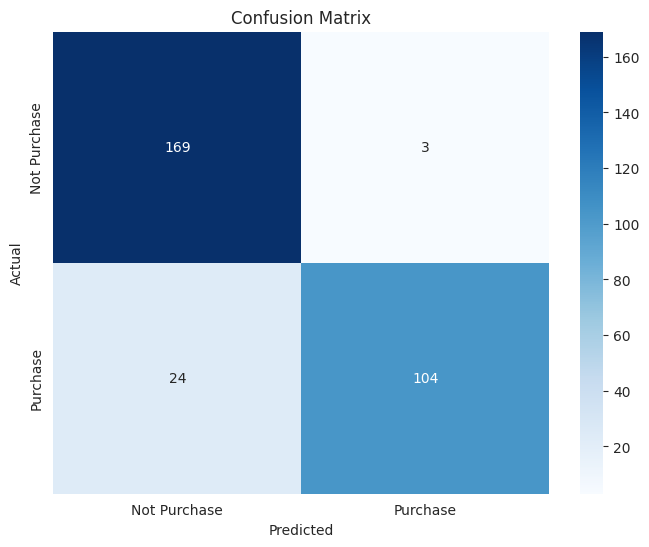

In [ ]:
y_pred = best_rf_mm.predict(X_test_minmax)

conf_matrix = confusion_matrix(y_test, y_pred)
target_names = ['Not Purchase','Purchase']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Feature Importance

In [ ]:
importances = best_rf_mm.feature_importances_

In [ ]:
feature_importance = pd.Series(importances, index=X_train_scaled.columns)

In [ ]:
feature_importance = feature_importance.sort_values(ascending=True)
top_5_features = feature_importance.sort_values(ascending=False)[:5].index
lowest_5_features = feature_importance.sort_values()[:5].index

top_5_importance = feature_importance[top_5_features].sort_values(ascending=True)
lowest_5_importance = feature_importance[lowest_5_features].sort_values(ascending=True)


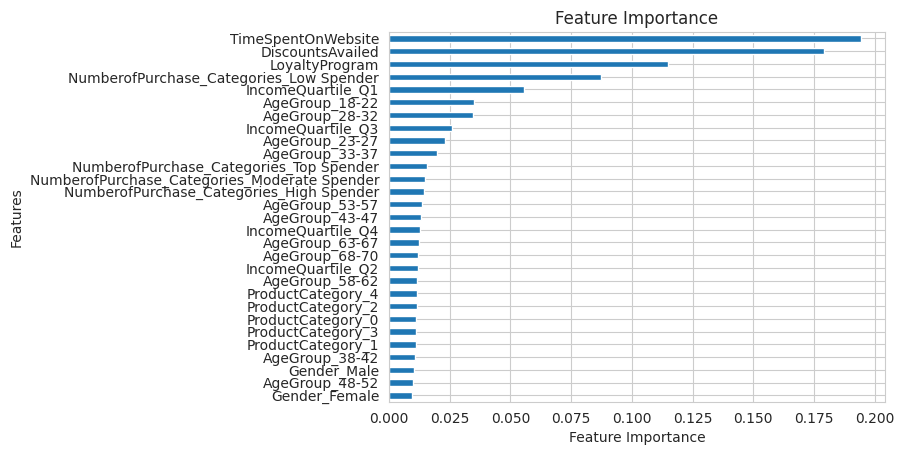

In [ ]:
import matplotlib.pyplot as plt

feature_importance.plot(kind='barh')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()


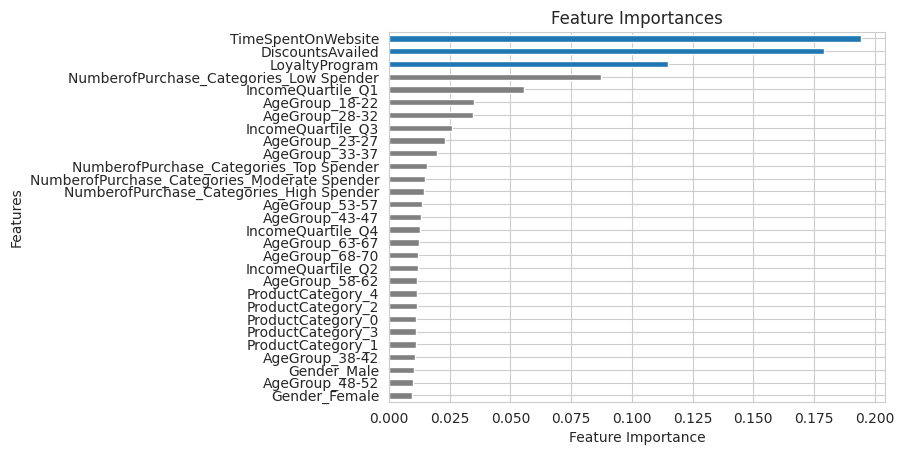

In [ ]:
import matplotlib.pyplot as plt

# Sort feature importance values
feature_importance = feature_importance.sort_values(ascending=True)

# Define colors: blue for top 5, gray for the rest
colors = ['gray'] * (len(feature_importance) - 3) + ['tab:blue'] * 3

# Plot feature importance
feature_importance.plot(kind='barh', color=colors)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()


# Recomendation

In [ ]:
df_v = df_raw.copy()

In [ ]:
# prompt: map df_v column purchaseStatus from 1 and 0 to yes and no

df_v['PurchaseStatus'] = df_v['PurchaseStatus'].replace({0: 'No', 1: 'Yes'})


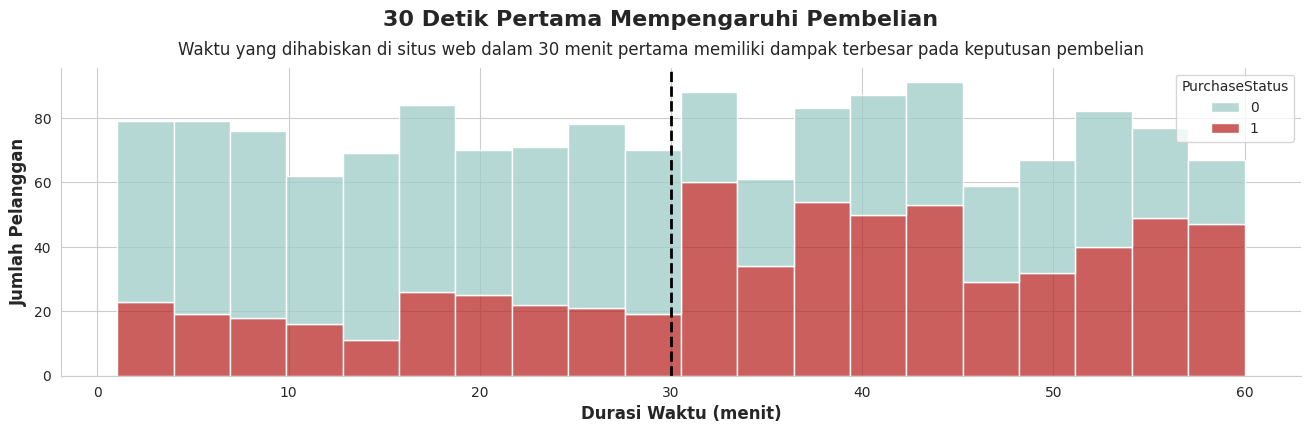

In [ ]:
fig, ax = plt.subplots(figsize=(16, 4))

sns.histplot(df, x='TimeSpentOnWebsite',
             bins=20, hue='PurchaseStatus',
             palette=['#9eccc8', '#b92a27'],
             multiple='stack',
             ax=ax)

plt.figtext(0.5, 1.0,
           "30 Menit Pertama Mempengaruhi Pembelian",
           ha='center', va='center', fontsize=16, weight='bold')

plt.figtext(0.5, 0.95,
           "\nWaktu yang dihabiskan di situs web dalam 30 menit pertama memiliki dampak terbesar pada keputusan pembelian",  # Explanation
           ha='center', va='center', fontsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.axvline(x=30, color='black', linestyle='dashed', linewidth=2)
# ax.axvline(x=1.4, color='red', linestyle='dashed', linewidth=2)

ax.set_xlabel("Durasi Waktu (menit)", fontsize=12, weight='bold')
ax.set_ylabel("Jumlah Pelanggan", fontsize=12, weight='bold')

plt.show()

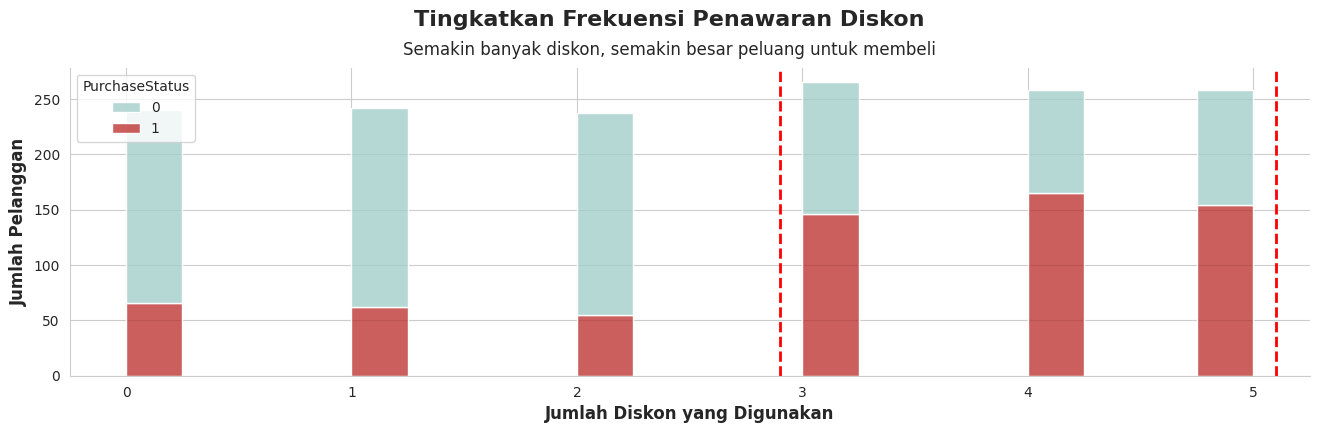

In [ ]:
fig, ax = plt.subplots(figsize=(16, 4))

sns.histplot(df, x='DiscountsAvailed',
             bins=20, hue='PurchaseStatus',
             palette=['#9eccc8', '#b92a27'],
             multiple='stack',
             ax=ax)

plt.figtext(0.5, 1.0,
           "Tingkatkan Frekuensi Penawaran Diskon",
           ha='center', va='center', fontsize=16, weight='bold')

plt.figtext(0.5, 0.95,
           "\nSemakin banyak diskon, semakin besar peluang untuk membeli",  # Explanation
           ha='center', va='center', fontsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.axvline(x=2.9, color='red', linestyle='dashed', linewidth=2)
ax.axvline(x=5.1, color='red', linestyle='dashed', linewidth=2)

ax.set_xlabel("Jumlah Diskon yang Digunakan", fontsize=12, weight='bold')
ax.set_ylabel("Jumlah Pelanggan", fontsize=12, weight='bold')

plt.show()

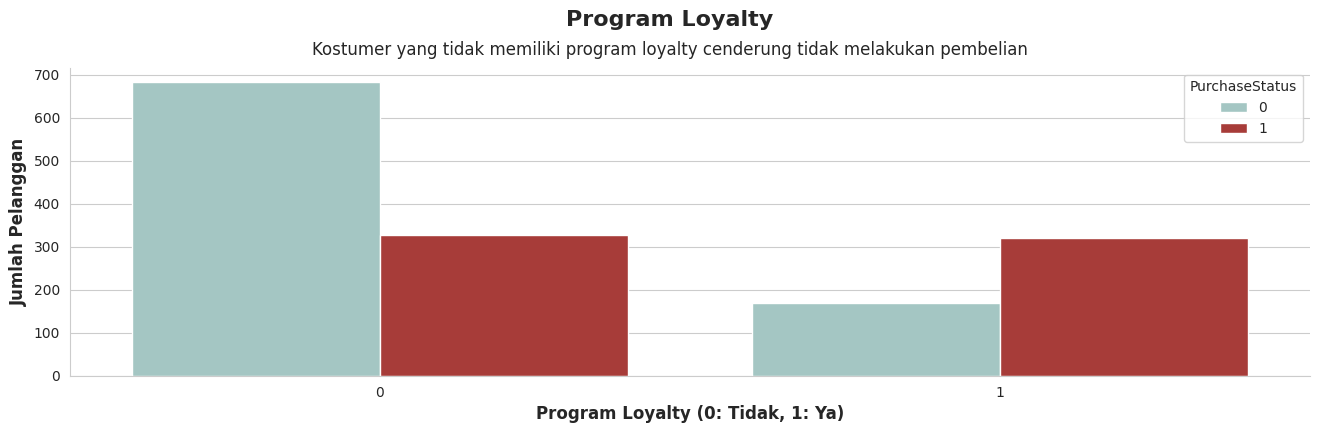

In [ ]:
fig, ax = plt.subplots(figsize=(16, 4))

sns.countplot(df, x='LoyaltyProgram',
             hue='PurchaseStatus',
             palette=['#9eccc8', '#b92a27'],
             ax=ax)

plt.figtext(0.5, 1.0,
           "Program Loyalty",
           ha='center', va='center', fontsize=16, weight='bold')

plt.figtext(0.5, 0.95,
           "\nKostumer yang tidak memiliki program loyalty cenderung tidak melakukan pembelian",  # Explanation
           ha='center', va='center', fontsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# ax.axvline(x=0.9, color='red', linestyle='dashed', linewidth=2)
# ax.axvline(x=, color='red', linestyle='dashed', linewidth=2)

# Update x and y labels to match the data
ax.set_xlabel("Program Loyalty (0: Tidak, 1: Ya)", fontsize=12, weight='bold')
ax.set_ylabel("Jumlah Pelanggan", fontsize=12, weight='bold')

plt.show()
